In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
string.punctuation
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
data = pd.read_csv('/content/davidson_dataset.csv')
data.head()

Unnamed: 0  count  ...  class                                              tweet
0           0      3  ...      2  !!! RT @mayasolovely: As a woman you shouldn't...
1           1      3  ...      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2           2      3  ...      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3           3      3  ...      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4           4      6  ...      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

[5 rows x 7 columns]

In [25]:
data.describe()

Unnamed: 0         count  ...       neither         class
count  24783.000000  24783.000000  ...  24783.000000  24783.000000
mean   12681.192027      3.243473  ...      0.549247      1.110277
std     7299.553863      0.883060  ...      1.113299      0.462089
min        0.000000      3.000000  ...      0.000000      0.000000
25%     6372.500000      3.000000  ...      0.000000      1.000000
50%    12703.000000      3.000000  ...      0.000000      1.000000
75%    18995.500000      3.000000  ...      0.000000      1.000000
max    25296.000000      9.000000  ...      9.000000      2.000000

[8 rows x 6 columns]

In [26]:
# percentile list
perc =[.20, .40, .60, .80]
data.dropna(inplace = True) 
  
# list of dtypes to include
include =['object', 'float', 'int']
data.describe(percentiles = perc, include = include)

Unnamed: 0  ...                                              tweet
count   24783.000000  ...                                              24783
unique           NaN  ...                                              24783
top              NaN  ...  He's like 30 something year old talking back t...
freq             NaN  ...                                                  1
mean    12681.192027  ...                                                NaN
std      7299.553863  ...                                                NaN
min         0.000000  ...                                                NaN
20%      5102.400000  ...                                                NaN
40%     10183.800000  ...                                                NaN
50%     12703.000000  ...                                                NaN
60%     15225.200000  ...                                                NaN
80%     20266.600000  ...                                                NaN
max     25296.000000  ...                                                NaN

[13 rows x 7 columns]

In [27]:
data["class"].describe()

count    24783.000000
mean         1.110277
std          0.462089
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: class, dtype: float64

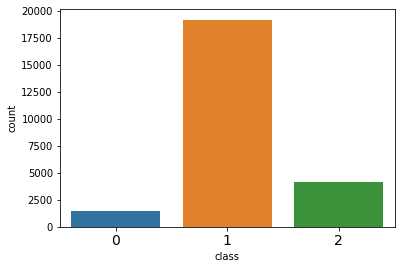

In [28]:
#plot the class distribution
small_size = 14
plt.rc('xtick', labelsize=small_size)  
sns.countplot(x='class',data=data)

In [29]:
print("This is neither hate speech nor offensive language")
normal = data[data['class']==2]
normal.head()

This is neither hate speech nor offensive language


Unnamed: 0  count  ...  class                                              tweet
0            0      3  ...      2  !!! RT @mayasolovely: As a woman you shouldn't...
40          40      3  ...      2    " momma said no pussy cats inside my doghouse "
63          63      3  ...      2  "@Addicted2Guys: -SimplyAddictedToGuys http://...
66          66      3  ...      2  "@AllAboutManFeet: http://t.co/3gzUpfuMev" woo...
67          67      3  ...      2  "@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...

[5 rows x 7 columns]

In [30]:
print("This is hate speech")
hs = data[data['class']==0]
hs.head()

This is hate speech


Unnamed: 0  ...                                              tweet
85           85  ...  "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...
89           90  ...  "@CB_Baby24: @white_thunduh alsarabsss" hes a ...
110         111  ...  "@DevilGrimz: @VigxRArts you're fucking gay, b...
184         186  ...  "@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...
202         204  ...  "@NoChillPaz: "At least I'm not a nigger" http...

[5 rows x 7 columns]

In [31]:
print("This is offensive language")
offensive = data[data['class']==1]
offensive.head()

This is offensive language


Unnamed: 0  count  ...  class                                              tweet
1           1      3  ...      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2           2      3  ...      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3           3      3  ...      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4           4      6  ...      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5           5      3  ...      1  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...

[5 rows x 7 columns]

1430
Hate speech keywords:



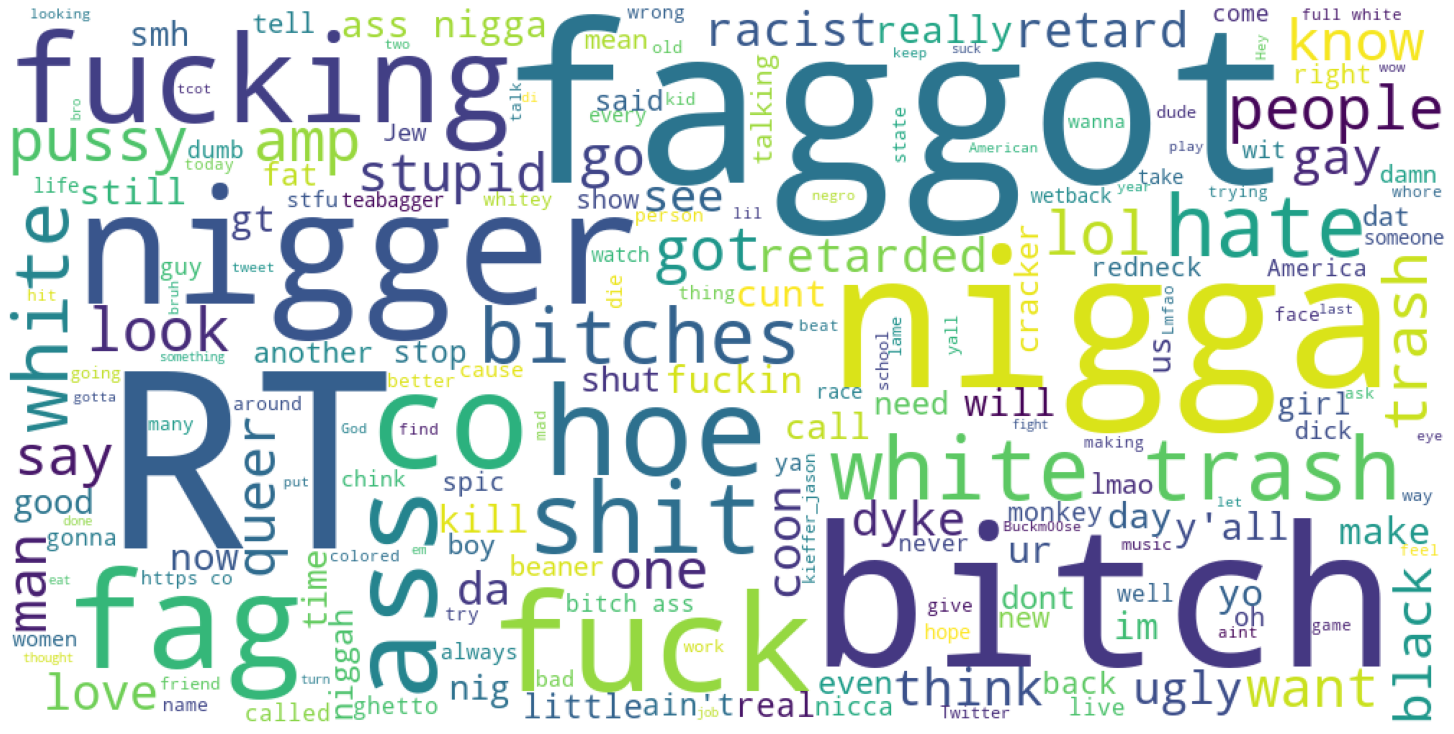

In [32]:
sentences = hs['tweet'].tolist()
print(len(sentences))

sentences_as_one_string = " ".join(sentences)
print("Hate speech keywords:")
print("")
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Offensive keywords:



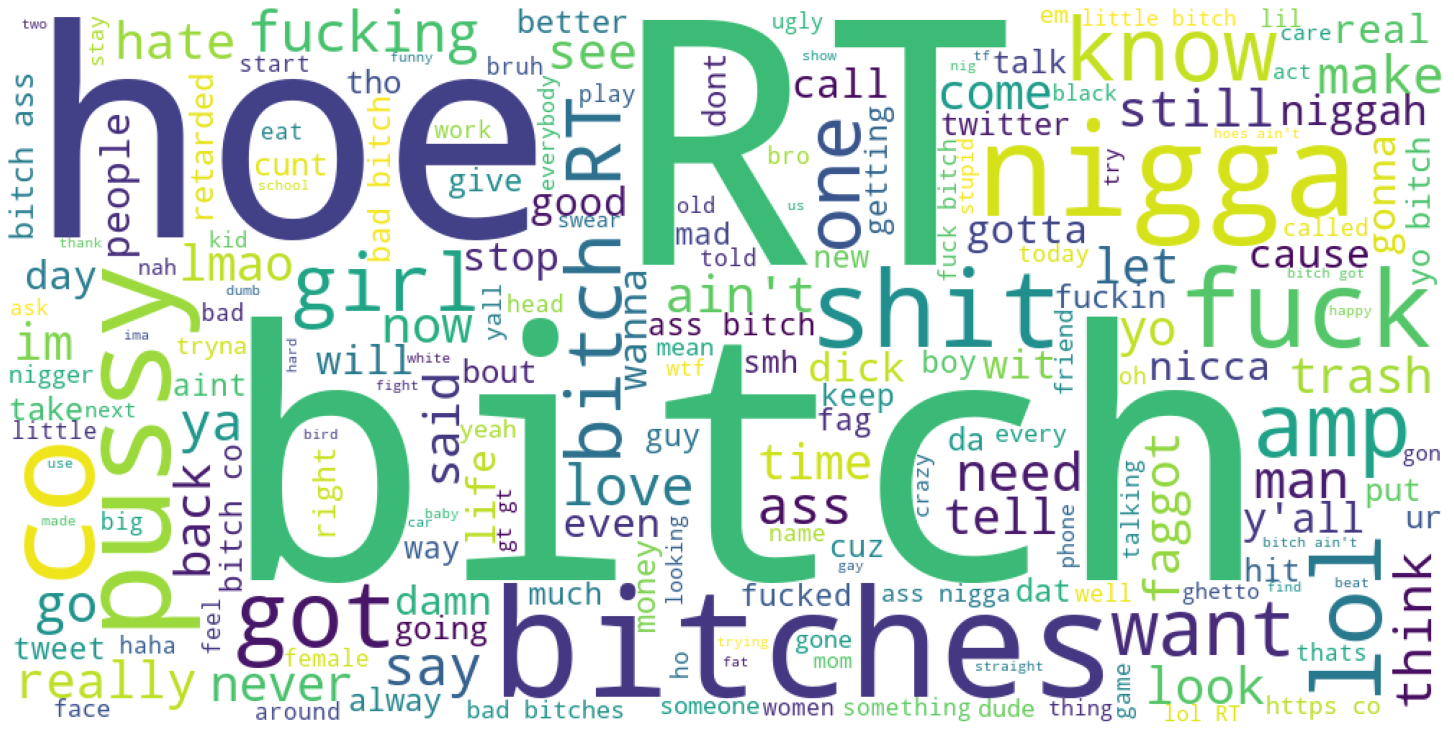

In [33]:
sentences = offensive['tweet'].tolist()
len(sentences)
print("Offensive keywords:")
print("")
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Neutral keywords:



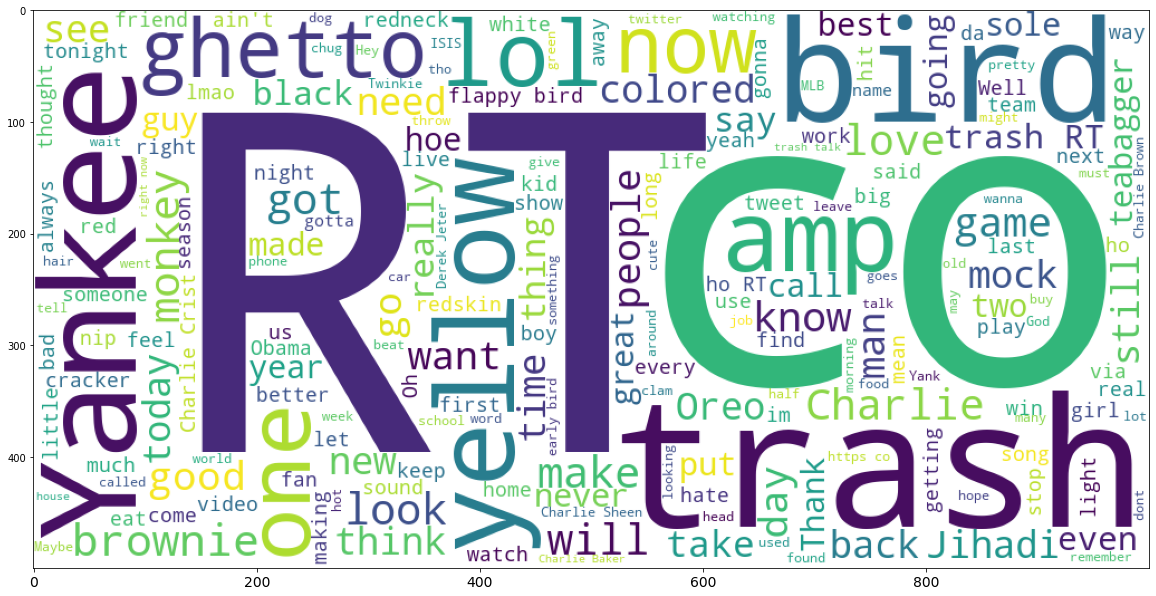

In [34]:
sentences = normal['tweet'].tolist()
len(sentences)
print("Neutral keywords:")
print("")
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))


In [35]:
# define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    Test_punc_removed_join_clean_join = ' '.join(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean_join


In [36]:
# Create a new Dataframe for cleaned text
data_clean = pd.DataFrame(columns=['class', 'tweet'])
data_clean['tweet'] = data['tweet'].apply(message_cleaning)
data_clean['class'] = data['class']
data_clean.head()

class                                              tweet
0      2  RT mayasolovely woman shouldnt complain cleani...
1      1  RT mleew17 boy dats coldtyga dwn bad cuffin da...
2      1  RT UrKindOfBrand Dawg RT 80sbaby4life ever fuc...
3      1           RT CGAnderson vivabased look like tranny
4      1  RT ShenikaRoberts shit hear might true might f...

In [37]:
print("Original version:")
print(data['tweet'][5]) 
print("Cleaned:")
print(data_clean['tweet'][5]) 

Original version:
!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"
Cleaned:
TMadisonx shit blows meclaim faithful somebody still fucking hoes 128514128514128514


1430
Hate speech keywords:



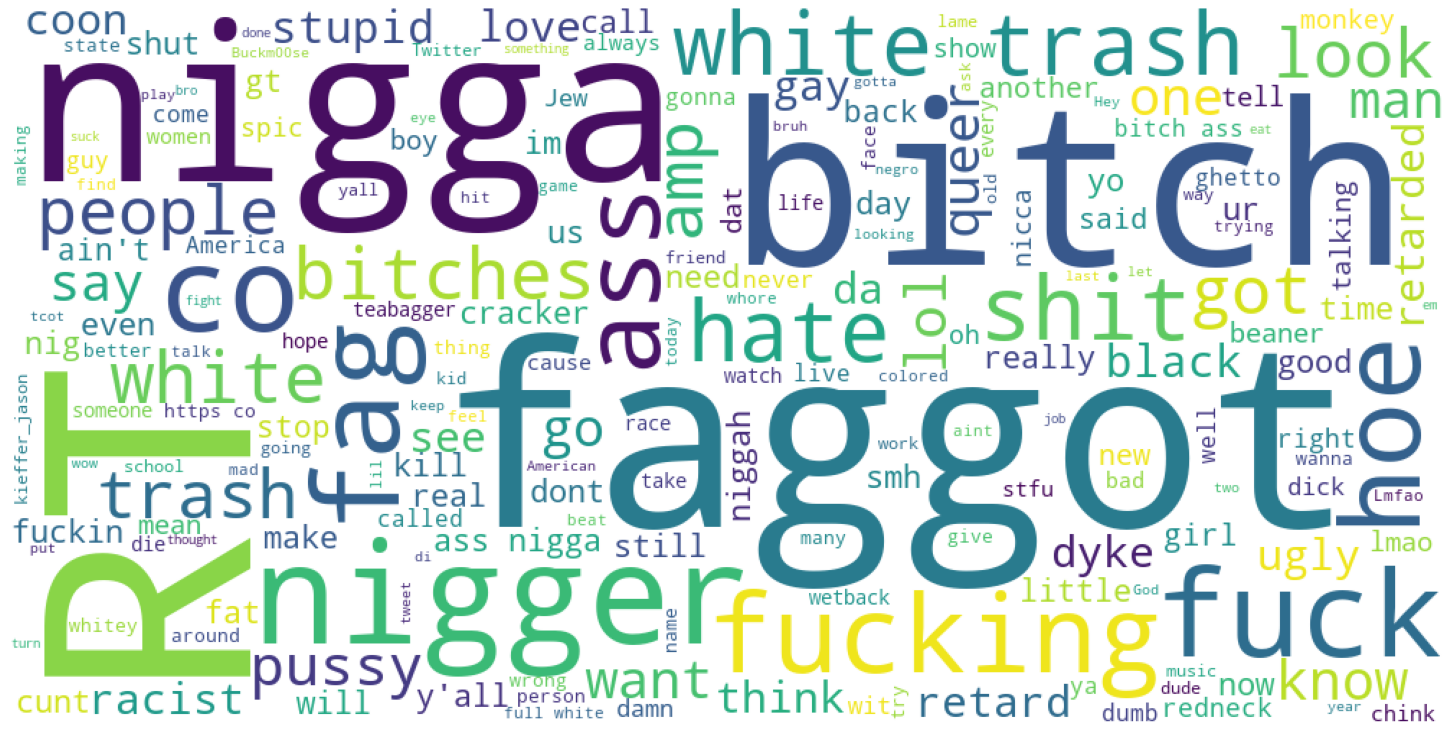

In [38]:
sentences = hs['tweet'].tolist()
print(len(sentences))

sentences_as_one_string = " ".join(sentences)
print("Hate speech keywords:")
print("")
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Offensive keywords:



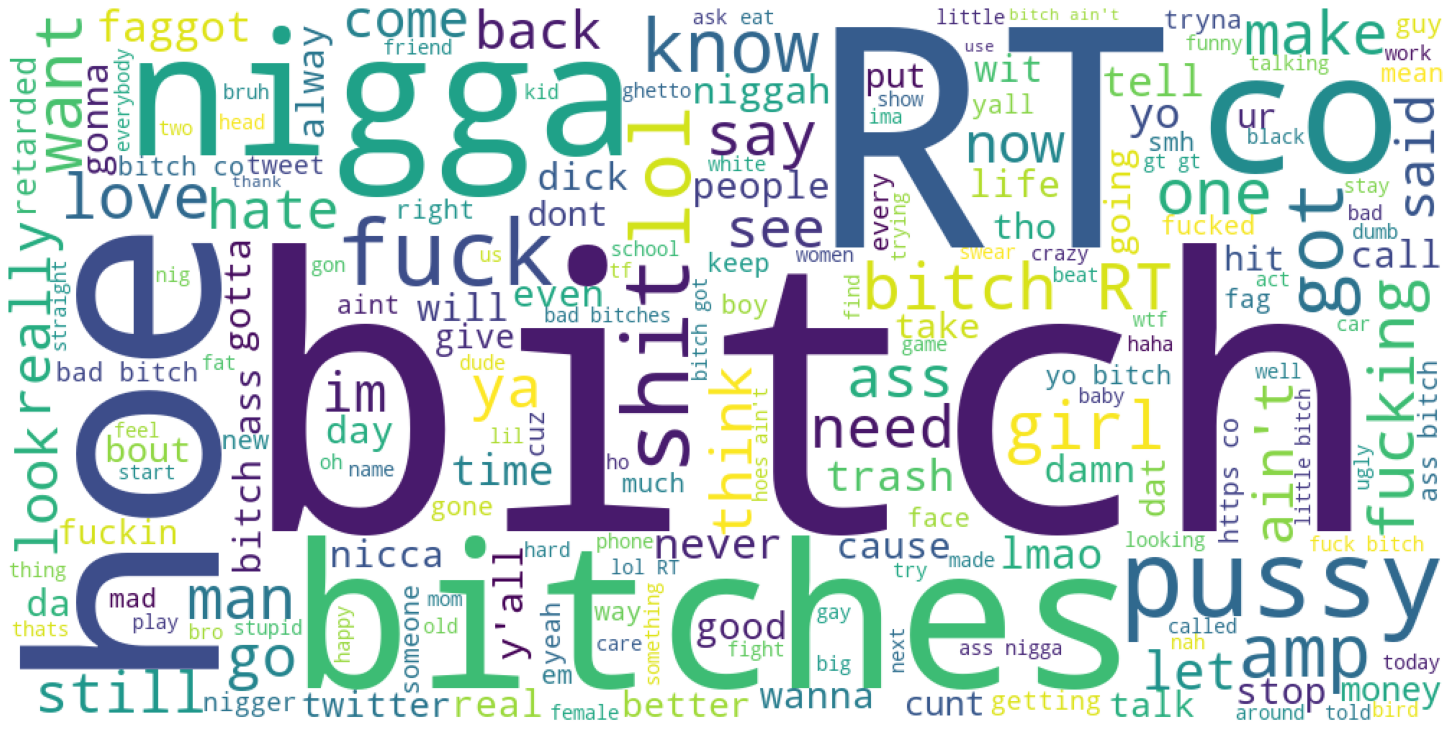

In [39]:
sentences = offensive['tweet'].tolist()
len(sentences)
print("Offensive keywords:")
print("")
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Normal keywords:



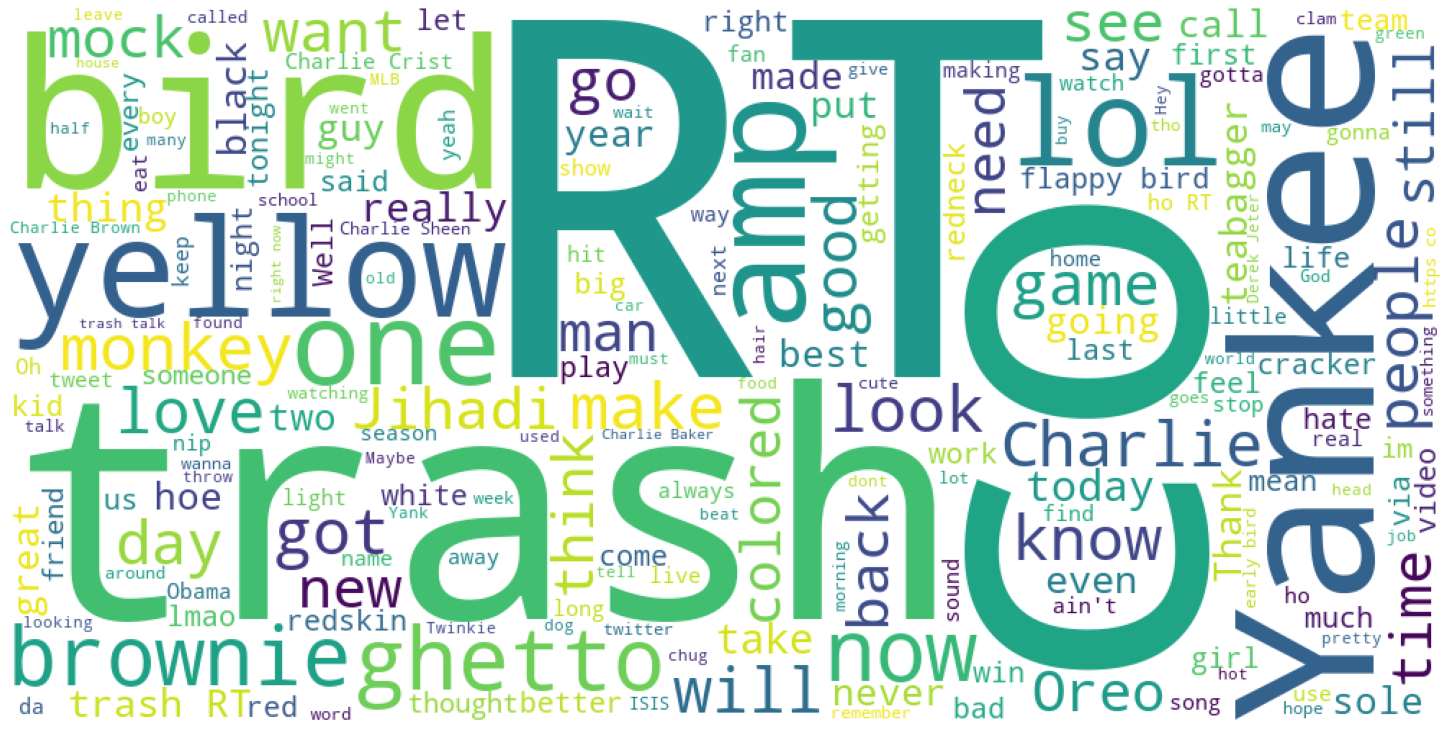

In [40]:
sentences = normal['tweet'].tolist()
len(sentences)
print("Normal keywords:")
print("")
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()